## Analyze spatial entropy for model realizations

In [79]:
# basic imports
import numpy as np                                        
import matplotlib.pyplot as plt     
import pickle
import pandas as pd

In [80]:
# adjust settings for matplotlib:


In [81]:
# Loading ipython widgets for interactive features:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

### Load Data

We first load the dataset from the generated `pickle` file:

In [235]:
# realizations = pickle.load(open("facies_realizations_ncut_64x64.pkl", 'rb'))
realizations = pickle.load(open("facies_realizations_ncut_f3_aniso_64x64_4.pkl", 'rb'))
df = pickle.load(open("data_frame_three_facies_2.pkl", 'rb'))

df.tail()

,index,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI
45,331,523,280.0,799.0,1.0,0.161938,395.717857,4212.827564
46,175,282,430.0,509.0,1.0,0.127796,77.090935,4846.149630
47,283,450,540.0,129.0,2.0,0.110192,3.691724,6185.818764
48,196,320,150.0,289.0,0.0,0.120452,4.539274,5532.875795
49,3,3,100.0,600.0,1.0,0.186167,217.109365,3732.114787


### Visualize realizations

As a first step, we visualize some of the generated geostatistical fields:

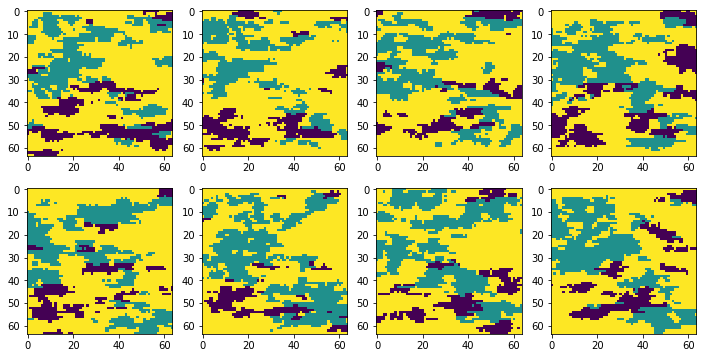

In [210]:
plt.figure(figsize=(12,6))
for i in range(1, 9):
    plt.subplot(2, 4, i)
    plt.imshow(realizations[i])

What do we observe? For comparison, here also the measurement locations:

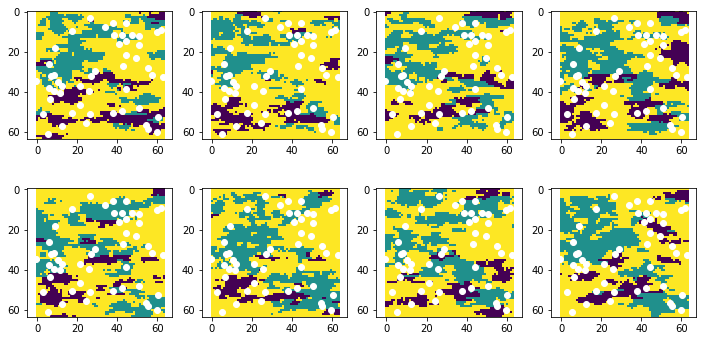

In [211]:
plt.figure(figsize=(12,6))
for i in range(1, 9):
    plt.subplot(2, 4, i)
    plt.imshow(realizations[i])
    plt.scatter(data_points[:,0]-0.5, data_points[:,1]-0.5, c='w')

...and for a bit more intuitive interpretation, here the possibility to flip through some examples:

In [212]:
def plot_realization(i):
    plt.figure(figsize=(12,8))
    plt.imshow(realizations[i][::-1,:])
    plt.scatter(data_points[:,0]-0.5, data_points[:,1]-0.5, c='w') #c=df["Facies"])

interact(plot_realization, i=widgets.IntSlider(min=1,max=99,step=1,value=1));
         
         
         

interactive(children=(IntSlider(value=1, description='i', max=99, min=1), Output()), _dom_classes=('widget-int…

### Spatial analysis using entropy

We now calculate the entropy of each location in space. Note the difference to many of the other examples we have seen this week: we here consider the outcome in each cell as a random variable, estimate probabilities for each outcome based on frequencies, and calculate the entropy:

$H(\vec{x}) = - \sum_i p_i(\vec{x}) \log p_i(\vec{x})$

We could do this calculation on our own - but for convenience, it is all coded up in a python module ().

In [213]:
import sys
sys.path.append("../../../hspace/")
import hspace.measures
import importlib
importlib.reload(hspace.measures)

pymc is not installed - Bayesian entropy estimation will not work.


<module 'hspace.measures' from '../../../hspace/hspace/measures.py'>

In [214]:
h_sec = hspace.measures.EntropySection(realizations.swapaxes(1,2))

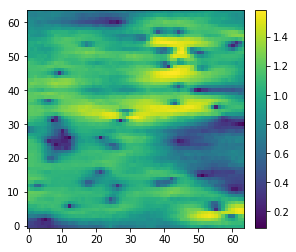

In [215]:
h_sec.plot_entropy();

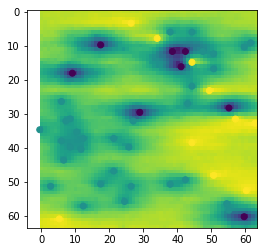

In [238]:
data_points = df.values[:,2:4]/1000*64
plt.imshow(np.sum(realizations, axis=0)[::-1,:])
plt.scatter(data_points[:,0]-0.5, data_points[:,1]-0.5, c=df["Facies"])
# plt.scatter(data_points[:,0], data_points[:,1], c='w')
# df.values[:,2:4]/1000*64
# df.plot.scatter(x="X", y="Y", c="Facies", colormap='viridis')

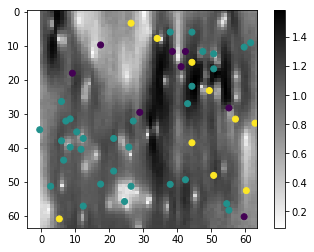

In [217]:
im = plt.imshow(h_sec.h[::-1,:], cmap='gray_r')
plt.scatter(data_points[:,0]-0.5, data_points[:,1]-0.5, c=df["Facies"])
plt.colorbar(im)

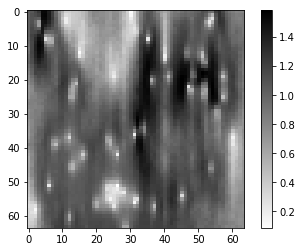

In [218]:
im = plt.imshow(h_sec.h[::-1,:], cmap='gray_r')
# plt.scatter(data_points[:,0]-0.5, data_points[:,1]-0.5, c=df["Facies"])
plt.colorbar(im)

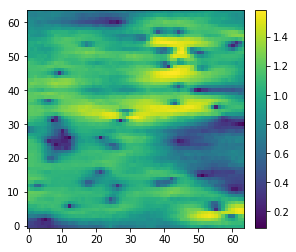

In [219]:
h_sec.plot_entropy();

In [245]:
m = np.meshgrid(np.arange(40,41), np.arange(30,40), indexing='xy')
pos = np.vstack([m[0].ravel(), m[1].ravel()]).T
pos = np.array([[40,33],[50,35],[42,45]])
h_sec.calc_cond_entropy_section(pos=pos);

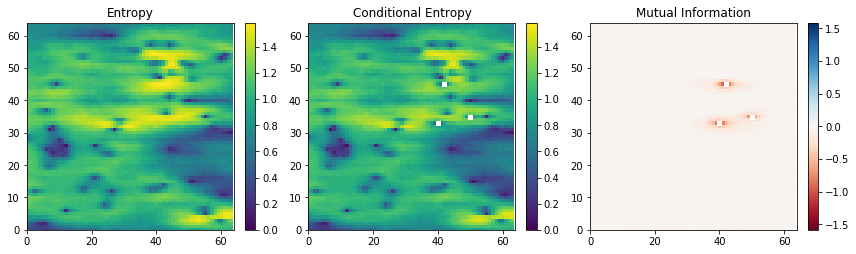

In [246]:
h_sec.plot_cond_entropy_and_MI()

In [199]:
m = np.meshgrid(np.arange(2,4), np.arange(4,6), indexing='xy')

In [236]:
realizations.shape

(1000, 64, 64)